<img src="Archivos/miia.jpg" width=800x>

# Laboratorio 2

## Hito: desarrollo de una herramienta analítica usando paquetes especializados para análisis de datos en Python

Este laboratorio corresponde al 34% de la calificación total del curso y su entrega está planteada para el final de la semana 8. Su objetivo es poner en práctica las competencias adquiridas sobre el uso de los paquetes Pandas, Seaborn y Scikit Learn, entre otros, para hacer exploración, análisis descriptivo, y abordar preguntas de negocio para un caso basado en datos reales. 

Especificamente, al desarrollar este laboratorio pondrás a prueba tus habilidades para:

1. Identificar y abordar una pregunta de negocio a partir de un contexto dado.
2. Cargar datos desde archivos utilizando métodos de Pandas.
3. Explorar, manejar, limpiar y agregar DataFrames.
5. Implementar análisis combinando métricas descriptivas, visualización, filtrado y agrupación.
6. Implementar análisis basado en modelos estadísticos o de machine learning.
7. Utilizar paquetes como ipywidgets o panel para agregar interactividad a los análisis de manera sencilla.

Te recomendamos leer por completo el enunciado del laboratorio antes de comenzar, de forma que tengas claro el propósito completo de la actividad, y puedas desarrollar tu solución apuntando a él en cada paso.

##  Contexto: *Desigualdad y factores de éxito en Pruebas "Saber 11" (Colombia)*

El ICFES es el Instituto Colombiano para el Fomento de la Educación Superior y está adscrito al Ministerio de Educación a nivel nacional. Como parte de sus funciones, el ICFES administra las pruebas *Saber 11*, las cuales evalúan a todos los estudiantes del país al final de su educación secundaria. El examen contiene preguntas que evalúan una variedad de áreas del conocimiento (p.ej., matemáticas, ciencias naturales), y se lleva a cabo dos veces al año, respondiendo a los diferentes calendarios académicos que siguen las instituciones educativas. Al momento de inscribirse a las pruebas, los estudiantes deben llenar un formulario que recoge información socio-demográfica y relacionada con la institución a la que pertenecen, con el fin de obtener evidencia respecto al desempeño de los estudiantes en la prueba según sus condiciones particulares.

<img src="Archivos/saberpro.png" width=700x>

Al igual que otros países de la región, Colombia tiene grandes retos en términos de desigualdad, particularmente en el contexto de educación primaria y secundaria. Por esta razón, para el Estado colombiano es muy valioso el amplio registro de datos que el ICFES genera alrededor de las Pruebas Saber 11, pues con ellos se pueden generar análisis sobre la calidad de la educación en el país y eventualmente dar lugar a recomendaciones sobre políticas públicas. En particular, la problemática a abordar en este caso de estudio es *desigualdad y factores de éxito en las pruebas Saber 11*. 

Los objetivos de este caso de estudio son:

* Entender el contenido de los archivos de datos proporcionados sobre las pruebas Saber11, generar un reporte acerca de sus características principales, e identificar qué partes de dicho contenido serán relevantes para el análisis.
* Identificar características de las variables de interés y relaciones entre ellas, por ejemplo, a través de agrupación, visualizaciones, y descriptivos en general.
* Abordar preguntas de negocio relacionadas con la problemática planteada, particularmente con respecto a los factores que puedan incidir significativamente en el puntaje de una persona que presenta la prueba; especialmente aquellos que se relacionen con mal desempeño.
* Generar una herramienta sencilla que permita a un usuario interactuar con alguno de los análisis realizados de forma relevante en el contexto del problema.

# 1. Entender el contenido de los archivos de datos

Esta misión consiste en hacerse una idea general del contenido de los datos y seleccionar un segmento de ellos que tenga potencial para los análisis propuestos.

Pautas generales:
* Leer los archivos de datos y agregarlos según sea necesario.
* Inspeccionar el archivo a partir de su encabezado, columnas, descripciones de las variables según su tipo (numéricas, categóricas).
* Definir un sub-conjunto de variables (e.g., una lista) que puedan ser relevantes para la problemática de interés.

Preguntas guía:
* ¿Qué dimensiones tienen los datos?
* ¿Con cuántos años y periodos de evaluación se cuenta?
* ¿Cuáles variables pueden ser de interés para la problemática planteada?
* ¿Qué porcentaje de datos faltantes o no válidos hay en las columnas de interés? ¿Podría eso afectar el análisis, y cómo abordarlo?

Esta misión corresponde a trabajo interno del analista, por lo cual no tiene un entregable para el cliente. Como entregable, puedes generar un reporte básico sobre el contenido de los archivos de datos, ya sea a través de la impresión de mensajes, la presentación de tablas resumen, u otros.

In [33]:
# LAURA I. PINILLA MESA

import plotly.graph_objects as go
import math as math_
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import seaborn as sns
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [2]:
#Importación de los datos

print("Los períodos que se tendrán en cuenta para el análisis de las variables que pueden explicar el puntaje global de los estudiantes en las pruebas Saber 11, son los correspondientes a 2020-1, 2020-2 y 2021-1.")

#Los datos a importar corresponden a los períodos 20201, 20202, y 20211
base_20201 = pd.read_csv("./Archivos/SB11_20201.txt",delimiter='¬',header=0)
base_20202 = pd.read_csv("./Archivos/SB11_20202.txt",delimiter='¬',header=0)
base_20211 = pd.read_csv("./Archivos/SB11_20211.txt",delimiter='¬',header=0)

#Para unir las 3 bases de datos, se tuvieron en cuenta sólo las columnas que estaban presente en las 3 bases
base_20201 = base_20201.drop(['ESTU_INSE_INDIVIDUAL','ESTU_NSE_INDIVIDUAL','ESTU_NSE_ESTABLECIMIENTO','ESTU_GENERACION-E'], axis=1)
base_20202 = base_20202.drop(['ESTU_INSE_INDIVIDUAL','ESTU_NSE_INDIVIDUAL','ESTU_NSE_ESTABLECIMIENTO','ESTU_GENERACION-E'], axis=1)
base_20211 = base_20211.drop(['PERCENTIL_ESPECIAL_GLOBAL'], axis=1)
base_completa = base_20201.append(base_20202, ignore_index = False, verify_integrity = False, sort = False)
base_completa = base_completa.append(base_20211, ignore_index = False, verify_integrity = False, sort = False)

Los períodos que se tendrán en cuenta para el análisis de las variables que pueden explicar el puntaje global de los estudiantes en las pruebas Saber 11, son los correspondientes a 2020-1, 2020-2 y 2021-1.


/opt/anaconda3/lib/python3.8/site-packages/pandas/util/_decorators.py:311: ParserWarning: Falling back to the 'python' engine because the separator encoded in utf-8 is > 1 char long, and the 'c' engine does not support such separators; you can avoid this warning by specifying engine='python'.
  return func(*args, **kwargs)


In [90]:
#Inspección base de datos

#Dimensiones
print("Filas:",base_completa.shape[0],", Columnas:",base_completa.shape[1])
#Tipos de datos
print("Tipos de datos de la base: ")
base_completa.dtypes

Filas: 535835 , Columnas: 77
Tipos de datos de la base: 


ESTU_TIPODOCUMENTO           object
ESTU_NACIONALIDAD            object
ESTU_GENERO                  object
ESTU_FECHANACIMIENTO         object
PERIODO                       int64
                             ...   
PERCENTIL_INGLES            float64
DESEMP_INGLES                object
PUNT_GLOBAL                   int64
PERCENTIL_GLOBAL            float64
ESTU_ESTADOINVESTIGACION     object
Length: 77, dtype: object

In [91]:
#Datos faltantes
lista_columnas = base_completa.columns
total_faltantes = 0
for i in lista_columnas:
    total_faltantes = total_faltantes+base_completa[i].isnull().sum()
print("El total de faltantes en la base de datos es: ",total_faltantes)

El total de faltantes en la base de datos es:  555106


Del total de las 77 variables, se seleccionaron sólo algunas que son de interés para la problemática planteada. Se descartaron varias variables que eran redundantes, como por ejemplo los códigos de los municipios y departamentos, y las variables que no tenían una relación potencial con el desempeño en las pruebas Saber11, como por ejemplo el ID del estudiante, los códigos DANE de varias variables, entre otros.

In [92]:
#Base variables
base_variables = base_completa.loc[:,["ESTU_GENERO","ESTU_TIENEETNIA","ESTU_DEPTO_RESIDE","ESTU_MCPIO_RESIDE","FAMI_ESTRATOVIVIENDA","FAMI_TIENEINTERNET","FAMI_TIENECOMPUTADOR","ESTU_HORASSEMANATRABAJA","COLE_CALENDARIO","COLE_JORNADA","PUNT_GLOBAL"]]
lista_columnas_variables = base_variables.columns
print("Las variables seleccionadas, agrupadas por categorías, son: \
      \n "" \
      \n * Información Personal: \
          \n ESTU_GENERO: Género \
          \n ESTU_TIENEETNIA: Pertenece a un grupo étnico minoritario \
      \n "" \
      \n * Información de Contacto: \
          \n ESTU_DEPTO_RESIDE: Departamento de residencia \
          \n ESTU_MCPIO_RESIDE: Municipio de residencia \
      \n "" \
      \n * Información Socioeconómica: \
          \n FAMI_ESTRATOVIVIENDA: Estrato socioeconómico de la vivienda \
          \n FAMI_TIENEINTERNET: El hogar cuenta con servicio de internet \
          \n FAMI_TIENECOMPUTADOR: El hogar cuenta con un computador \
          \n ESTU_HORASSEMANATRABAJA: Horas que trabajó durante la semana \
      \n "" \
      \n * Información del Colegio: \
          \n COLE_CALENDARIO: Calendario académico del colegio \
          \n COLE_JORNADA: Jornada en la que estudia \
      \n "" \
      \n * PUNT_GLOBAL: Puntaje total obtenido en las pruebas Saber11")

Las variables seleccionadas, agrupadas por categorías, son:       
        
 * Información Personal:           
 ESTU_GENERO: Género           
 ESTU_TIENEETNIA: Pertenece a un grupo étnico minoritario       
        
 * Información de Contacto:           
 ESTU_DEPTO_RESIDE: Departamento de residencia           
 ESTU_MCPIO_RESIDE: Municipio de residencia       
        
 * Información Socioeconómica:           
 FAMI_ESTRATOVIVIENDA: Estrato socioeconómico de la vivienda           
 FAMI_TIENEINTERNET: El hogar cuenta con servicio de internet           
 FAMI_TIENECOMPUTADOR: El hogar cuenta con un computador           
 ESTU_HORASSEMANATRABAJA: Horas que trabajó durante la semana       
        
 * Información del Colegio:           
 COLE_CALENDARIO: Calendario académico del colegio           
 COLE_JORNADA: Jornada en la que estudia       
        
 * PUNT_GLOBAL: Puntaje total obtenido en las pruebas Saber11


In [93]:
#Datos faltantes base variables
total_faltantes_variables = 0
for i in lista_columnas_variables:
    total_faltantes_variables = total_faltantes_variables+base_variables[i].isnull().sum()
print("El total de faltantes en la base de datos con las variables seleccionadas es: ",total_faltantes_variables)
print("Estos datos faltantes serán eliminados de la base de datos depurada.")

El total de faltantes en la base de datos con las variables seleccionadas es:  83244
Estos datos faltantes serán eliminados de la base de datos depurada.


In [94]:
#Base depurada
base_depurada = base_variables.dropna()
#Dimensiones base depurada
print("Filas base depurada:",base_depurada.shape[0],", Columnas base depurada:",base_depurada.shape[1])

Filas base depurada: 500465 , Columnas base depurada: 11


In [95]:
#Factorizar las variables
copia_base_depurada = base_depurada.copy()
class_type = copia_base_depurada.columns.to_series().groupby(copia_base_depurada.dtypes).groups
ctext = class_type[np.dtype('object')]
for c in ctext:
    copia_base_depurada[c], _ = pd.factorize(copia_base_depurada[c])
copia_base_depurada.head()

,ESTU_GENERO,ESTU_TIENEETNIA,ESTU_DEPTO_RESIDE,ESTU_MCPIO_RESIDE,FAMI_ESTRATOVIVIENDA,FAMI_TIENEINTERNET,FAMI_TIENECOMPUTADOR,ESTU_HORASSEMANATRABAJA,COLE_CALENDARIO,COLE_JORNADA,PUNT_GLOBAL
0,0,0,0,0,0,0,0,0,0,0,164
2,0,1,1,1,0,0,0,1,1,1,162
3,0,0,2,2,0,1,1,1,0,2,188
4,0,0,3,3,1,1,1,2,2,3,274
5,0,0,4,4,0,1,1,2,0,2,198


# 2. Identificar características y relaciones en las variables

Esta misión consiste en utilizar análisis descriptivos para explorar patrones o relaciones en las variables de interés para la problemática planteada.

Pautas generales:
* Utilizar Matplotlib y/o Seaborn para inspeccionar visualmente variables de interés; los métodos `distplot`, `pairplot`, `boxplot`, o `violinplot`, entre otros, pueden ser de utilidad.
* Utilizar el método `groupby` de Pandas, en conjunto con la visualización, para proveer evidencia sobre el impacto de variables socio-demográficas de interés sobre el desempeño de los estudiantes en la prueba.

Preguntas guía:
* ¿Hay patrones de interés en las distribuciones de las variables, o en las relaciones entre ellas?
* ¿Existe algún impacto significativo de variables socio-demográficas en los puntajes globales o por área?
* ¿Sobre cuáles variables vale la pena hacer un análisis más profundo?

El entregable de esta misión es un reporte (p.ej., un conjunto de visualizaciones) que de cuenta de los comportamientos más interesantes que se observen en las variables de interés para el contexto propuesto. El propósito de esta exploración es generar hipótesis o preguntas que guíen análisis más profundos. En ese sentido, con base en lo aprendido en esta sección, identifique las tres preguntas analíticas que plantearía con mayor prioridad, teniendo en cuenta el contexto y los datos disponibles; estas preguntas NO se deben abordar en términos de código para el laboratorio (únicamente formularse).

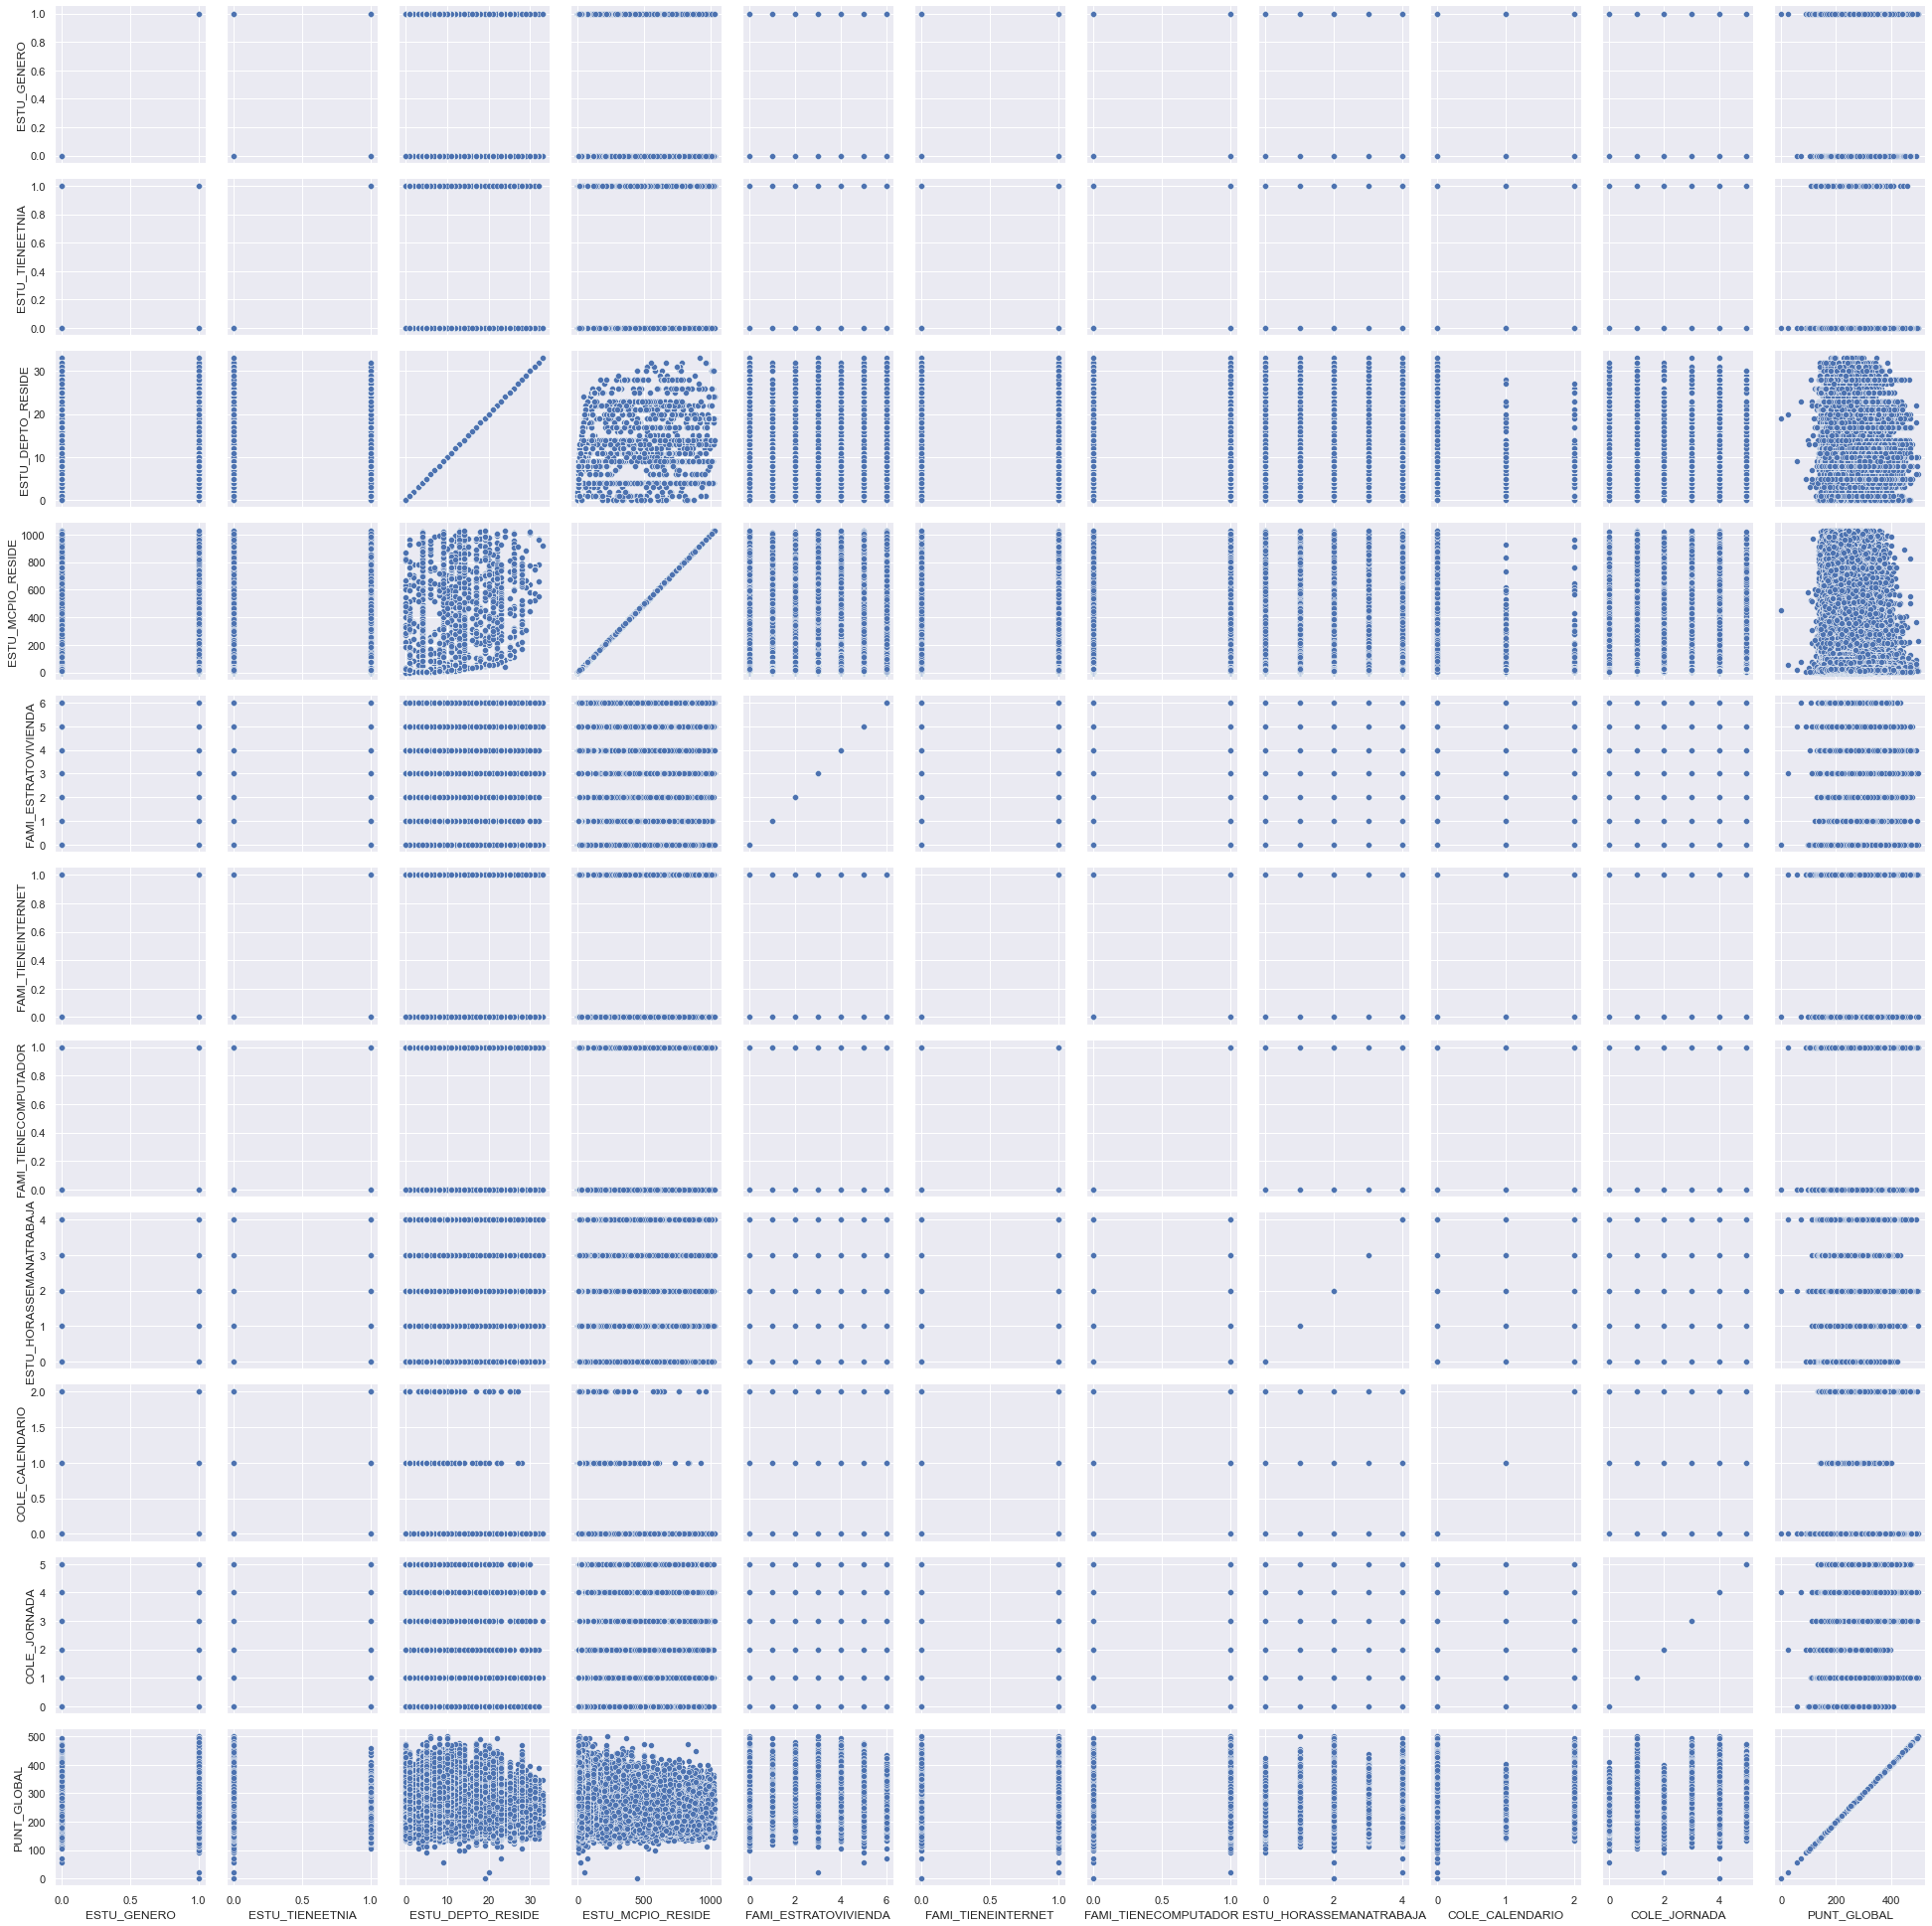

In [15]:
#Pairplot de las variables
g = sns.PairGrid(copia_base_depurada)
g.map(sns.scatterplot)

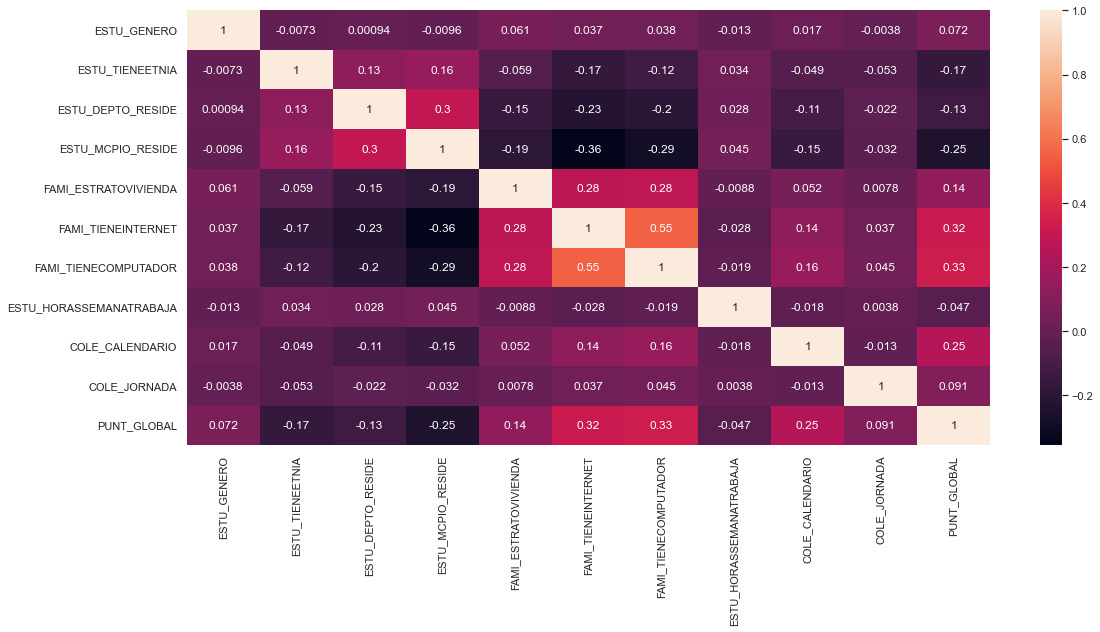

In [22]:
#Matriz de correlaciones
copia_base_depurada.corr()
sns.heatmap(copia_base_depurada.corr(), annot=True)
plt.show()

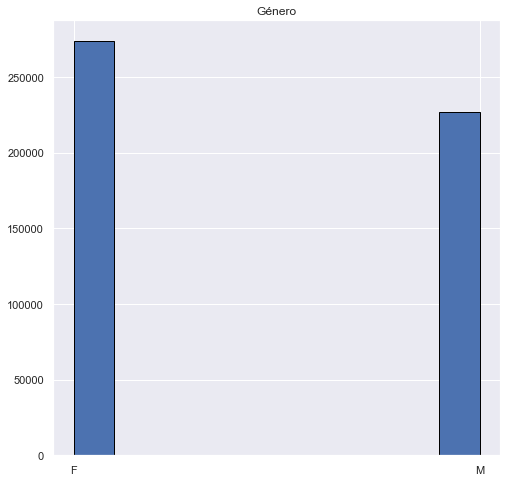

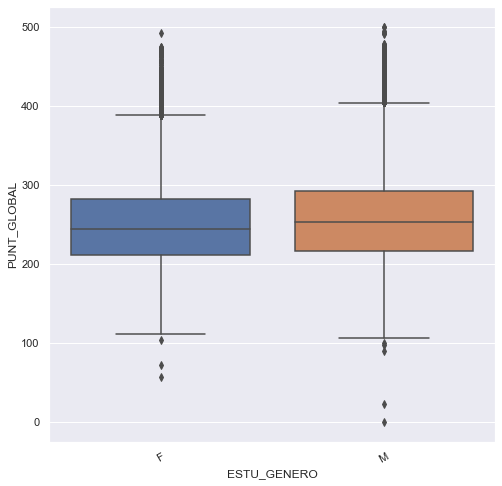

In [13]:
# Género
genero = base_depurada.loc[:,"ESTU_GENERO"]
plt.title('Género')
plt.hist(genero, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.show()
plt.clf()

sns.set(rc={"figure.figsize":(8, 8)})
box_genero = sns.boxplot(x="ESTU_GENERO", y="PUNT_GLOBAL", data=base_depurada)
box_genero.set_xticklabels(box_genero.get_xticklabels(),rotation = 30)
plt.show()

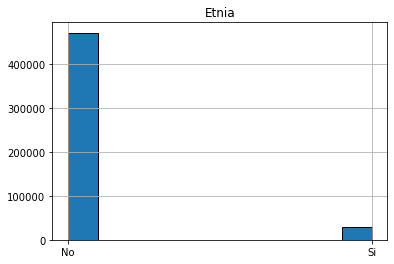

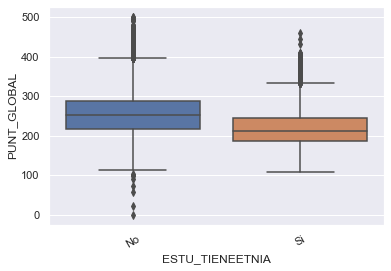

In [9]:
# Etnia
etnia = base_depurada.loc[:,"ESTU_TIENEETNIA"]
plt.title('Etnia')
plt.hist(etnia, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.show()
plt.clf()

sns.set(rc={"figure.figsize":(8, 8)})
box_etnia = sns.boxplot(x="ESTU_TIENEETNIA", y="PUNT_GLOBAL", data=base_depurada)
box_etnia.set_xticklabels(box_etnia.get_xticklabels(),rotation = 30)
plt.show()

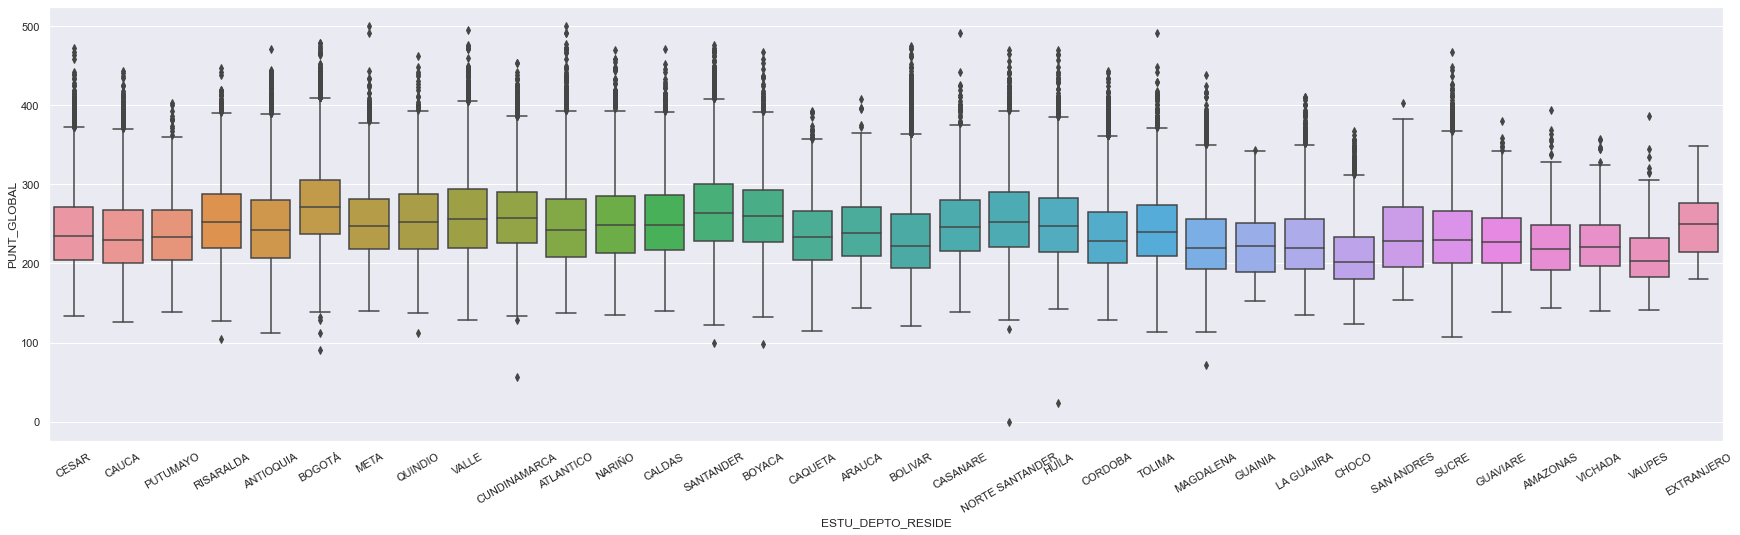

In [11]:
# Departamento
sns.set(rc={"figure.figsize":(30, 8)})
box_departamento = sns.boxplot(x="ESTU_DEPTO_RESIDE", y="PUNT_GLOBAL", data=base_depurada)
box_departamento.set_xticklabels(box_departamento.get_xticklabels(),rotation = 30)
plt.show()

In [ ]:
#

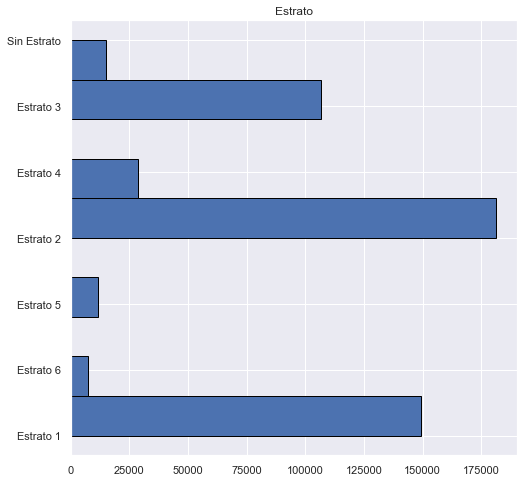

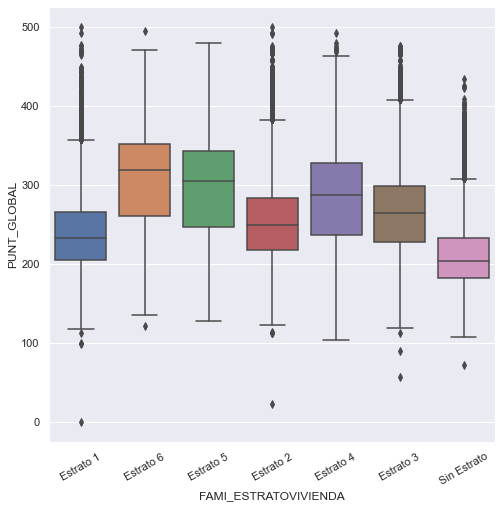

In [14]:
# Estrato
estrato = base_depurada.loc[:,"FAMI_ESTRATOVIVIENDA"]
plt.title('Estrato')
plt.hist(estrato, alpha=1, edgecolor = 'black',  linewidth=1, orientation = "horizontal")
plt.grid(True)
plt.show()
plt.clf()

sns.set(rc={"figure.figsize":(18, 8)})
box_estrato = sns.boxplot(x="FAMI_ESTRATOVIVIENDA", y="PUNT_GLOBAL", data=base_depurada)
box_estrato.set_xticklabels(box_estrato.get_xticklabels(),rotation = 30)
plt.show()

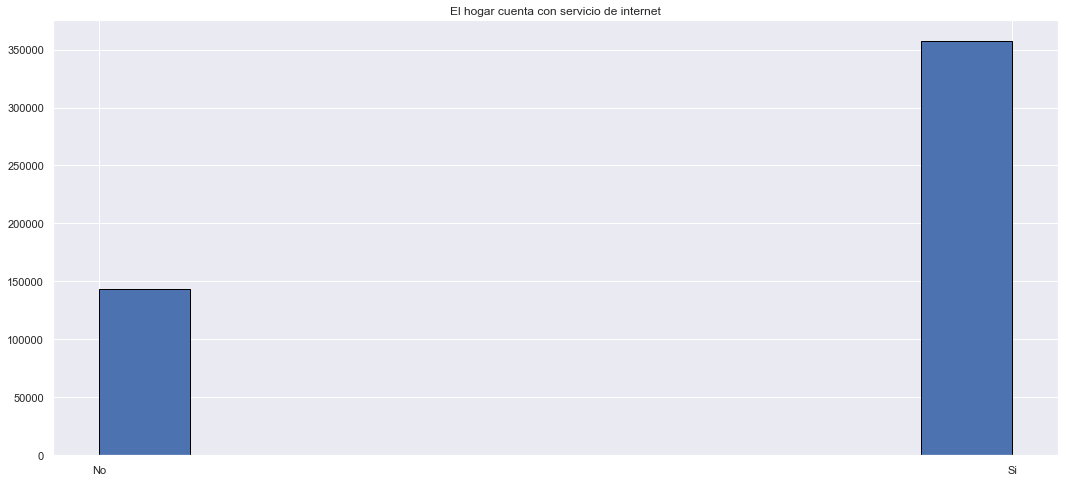

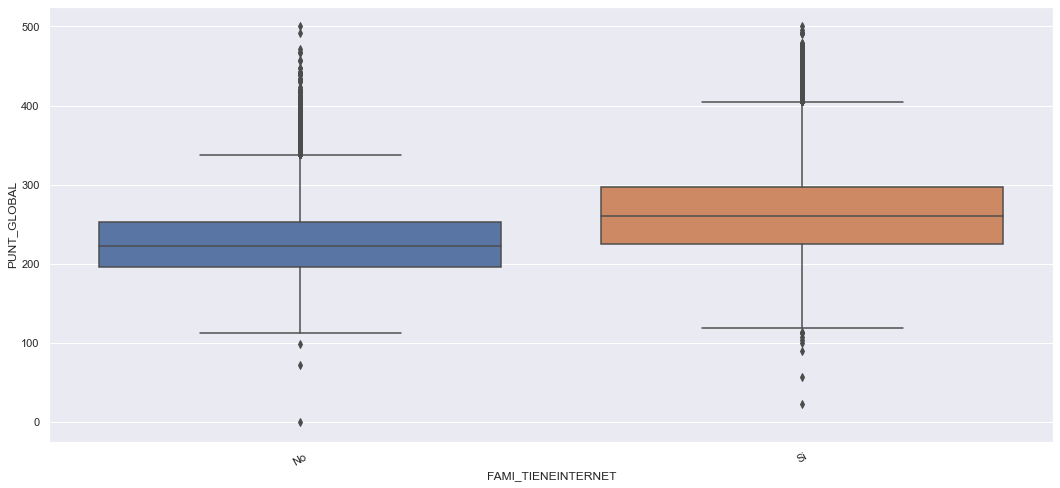

In [23]:
# Internet
internet = base_depurada.loc[:,"FAMI_TIENEINTERNET"]
plt.title('El hogar cuenta con servicio de internet')
plt.hist(internet, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.show()
plt.clf()

sns.set(rc={"figure.figsize":(8, 8)})
box_internet = sns.boxplot(x="FAMI_TIENEINTERNET", y="PUNT_GLOBAL", data=base_depurada)
box_internet.set_xticklabels(box_internet.get_xticklabels(),rotation = 30)
plt.show()

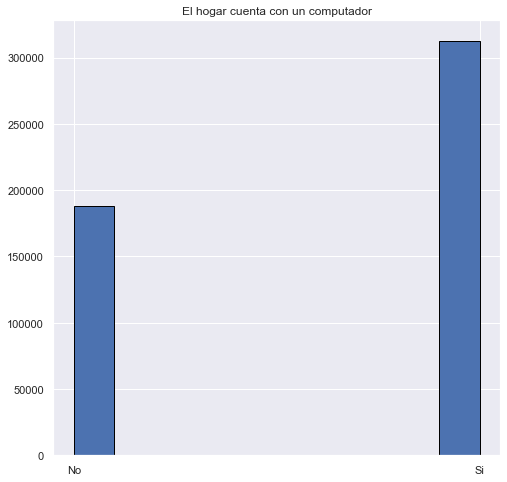

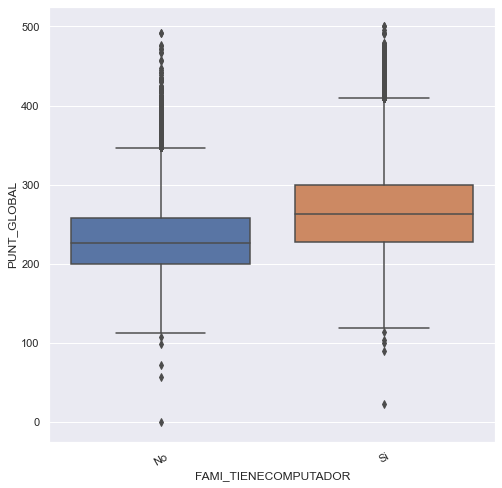

In [24]:
# Computador
computador = base_depurada.loc[:,"FAMI_TIENECOMPUTADOR"]
plt.title('El hogar cuenta con un computador')
plt.hist(computador, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.show()
plt.clf()

sns.set(rc={"figure.figsize":(8, 8)})
box_computador = sns.boxplot(x="FAMI_TIENECOMPUTADOR", y="PUNT_GLOBAL", data=base_depurada)
box_computador.set_xticklabels(box_computador.get_xticklabels(),rotation = 30)
plt.show()

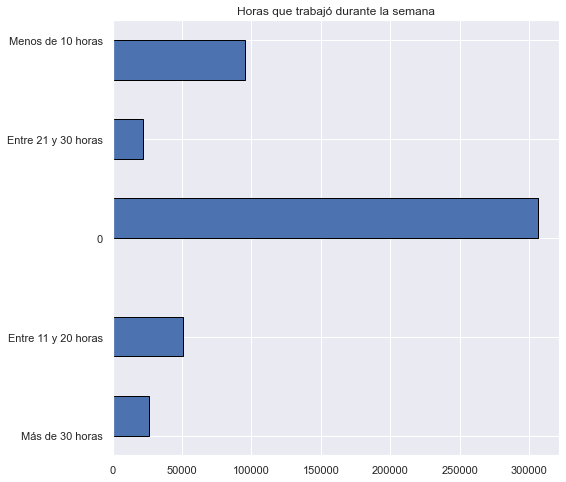

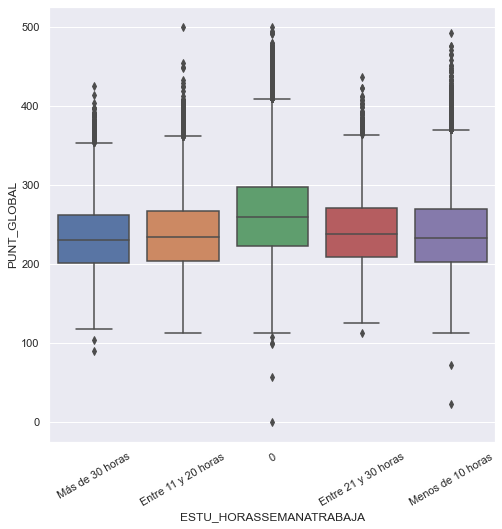

In [25]:
# Horas trabajadas
horas_trabajadas = base_depurada.loc[:,"ESTU_HORASSEMANATRABAJA"]
plt.title('Horas que trabajó durante la semana')
plt.hist(horas_trabajadas, alpha=1, edgecolor = 'black',  linewidth=1, orientation = "horizontal")
plt.grid(True)
plt.show()
plt.clf()

sns.set(rc={"figure.figsize":(18, 8)})
box_horastrabajadas = sns.boxplot(x="ESTU_HORASSEMANATRABAJA", y="PUNT_GLOBAL", data=base_depurada)
box_horastrabajadas.set_xticklabels(box_horastrabajadas.get_xticklabels(),rotation = 30)
plt.show()

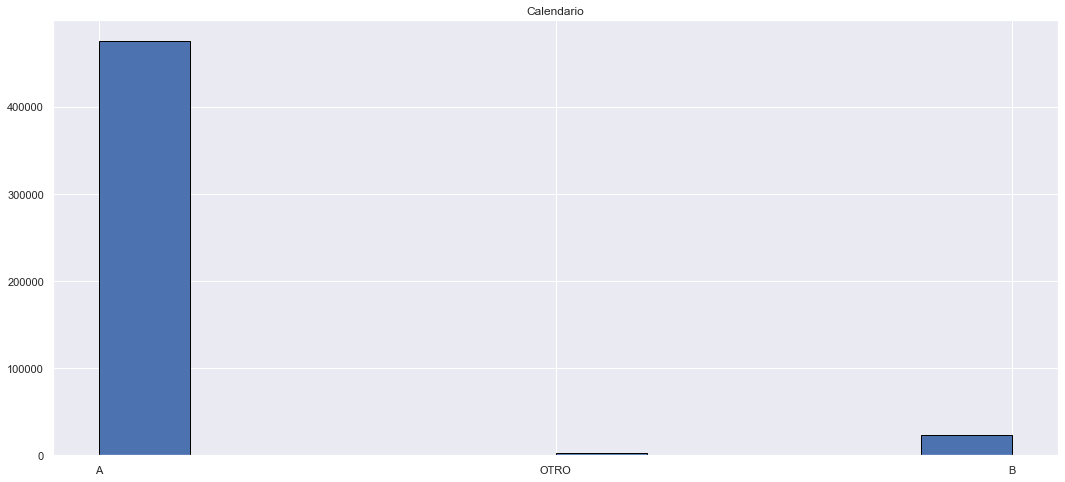

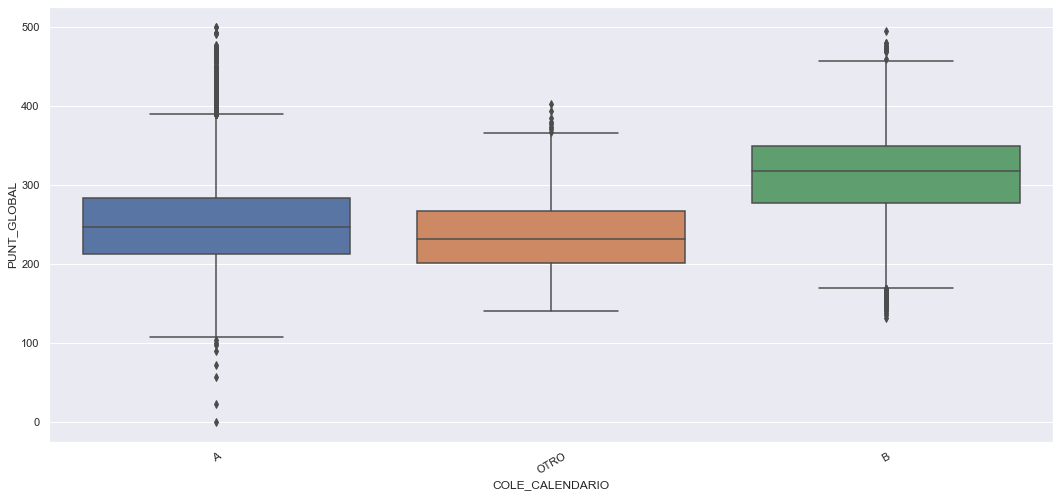

In [26]:
# Calendario
calendario = base_depurada.loc[:,"COLE_CALENDARIO"]
plt.title('Calendario')
plt.hist(calendario, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.show()
plt.clf()

sns.set(rc={"figure.figsize":(8, 8)})
box_calendario = sns.boxplot(x="COLE_CALENDARIO", y="PUNT_GLOBAL", data=base_depurada)
box_calendario.set_xticklabels(box_calendario.get_xticklabels(),rotation = 30)
plt.show()

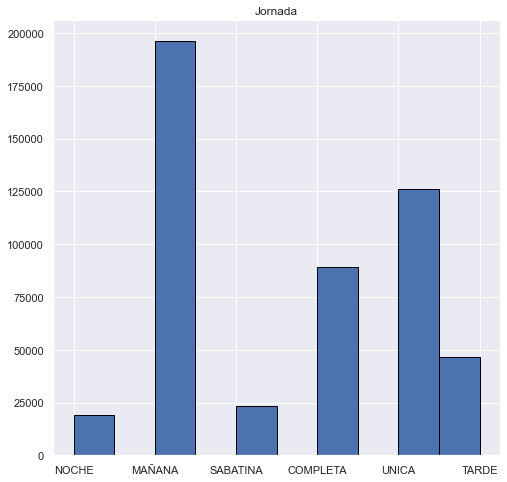

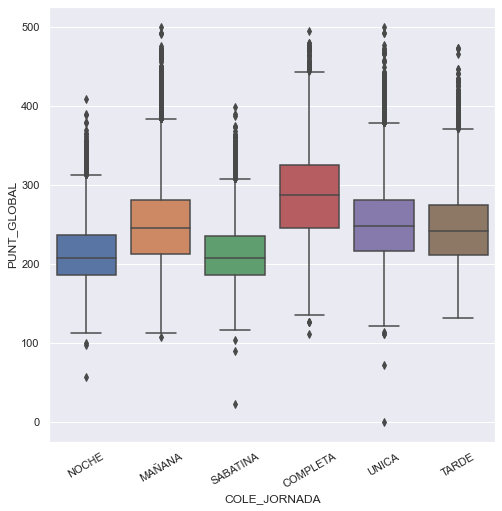

In [27]:
# Jornada
jornada = base_depurada.loc[:,"COLE_JORNADA"]
plt.title('Jornada')
plt.hist(jornada, alpha=1, edgecolor = 'black',  linewidth=1)
plt.grid(True)
plt.show()
plt.clf()

sns.set(rc={"figure.figsize":(18, 8)})
box_jornada = sns.boxplot(x="COLE_JORNADA", y="PUNT_GLOBAL", data=base_depurada)
box_jornada.set_xticklabels(box_jornada.get_xticklabels(),rotation = 30)
plt.show()

Según estos resultados obtenidos anteriormente, se observa que algunas de las variables seleccionadas para ese análisis presentan niveles altos de correlación, por lo que no sería prudente incluirlas todas dentro del modelo. Por ejemplo, la variable si tiene acceso a internet y la variable si tiene computador presentan una correlación del 0.55, por lo que sólo se tomará la variable si tiene acceso a internet. También, al revisar los boxplot se observa que algunas variables pueden no estar tan relacionadas con el desempeño en las pruebas Saber11. De esta manera, el nuevo subconjunto de variables escogido para el desarrollo del modelo es el siguiente:

In [96]:
#Base final
base_final = base_depurada.loc[:,["ESTU_TIENEETNIA","ESTU_DEPTO_RESIDE","FAMI_ESTRATOVIVIENDA","FAMI_TIENEINTERNET","COLE_CALENDARIO","PUNT_GLOBAL"]]

print("Las variables seleccionadas son: \
      \n "" \
      \n ESTU_TIENEETNIA: Pertenece a un grupo étnico minoritario \
      \n ESTU_DEPTO_RESIDE: Departamento de residencia \
      \n FAMI_ESTRATOVIVIENDA: Estrato socioeconómico de la vivienda \
      \n FAMI_TIENEINTERNET: El hogar cuenta con servicio de internet \
      \n COLE_CALENDARIO: Calendario académico del colegio \
      \n PUNT_GLOBAL: Puntaje total obtenido en las pruebas Saber11")

Las variables seleccionadas son:       
        
 ESTU_TIENEETNIA: Pertenece a un grupo étnico minoritario       
 ESTU_DEPTO_RESIDE: Departamento de residencia       
 FAMI_ESTRATOVIVIENDA: Estrato socioeconómico de la vivienda       
 FAMI_TIENEINTERNET: El hogar cuenta con servicio de internet       
 COLE_CALENDARIO: Calendario académico del colegio       
 PUNT_GLOBAL: Puntaje total obtenido en las pruebas Saber11


PREGUNTAS ANALÍTICAS:

1. Se podría analizar si existe una relación entre algunas variables socioeconómicas (como el estrato y ciertas características del hogar) y el desempeño en las pruebas Saber 11, para ver si la desigualdad influye sobre los factores de éxito en estas pruebas.

2. Se podría analizar si existe una relación entre el calendario del colegio de los estudiantes (A o B) y el desempeño en las pruebas Saber 11.

3. Se podría analizar si existe una relación entre el lugar de residencia de los estudiantes (departamento y/o municipio) y el desempeño en las pruebas Saber 11.

# 3. Abordar preguntas de negocio planteadas

Esta misión consiste en proponer, implementar y evaluar el desempeño modelo(s) que busque(n) explicar las relaciones entre factores socio-demográficos y desempeño en la prueba.

Pautas generales:
* Seleccionar variables y proponer modelos acordes a dichas variables y al contexto del problema.
* Utilizar los paquetes StatsModels y Scikit Learn para indagar sobre los aspectos que contribuyen al éxito de los estudiantes. Particularmente, las clases correspondientes a regresión lineal y regresión logística, entre otras, pueden ser útiles.
* Utilizar las métricas de evaluación de desempeño (disponibles en los paquetes mencionados), para concluir sobre la validez de los modelos propuestos.

Preguntas guía:
* ¿Existe algún sub-conjunto de variables socio-demográficas que explique razonablemente bien el desempeño de los estudiantes en la prueba?
* Definiendo como "estudiante en riesgo" a quien tenga un puntaje por debajo del percentil $\alpha$ en más de la mitad de las áreas de la prueba, ¿cuáles variables socio-demográficas permitirían "predecir" si un estudiante pertenecerá a dicho grupo?

El entregable de esta misión es un reporte sobre el desempeño de los modelos propuestos para abordar al menos una de las preguntas guía planteadas, acompañado de una conclusión sobre los resultados del modelo (si son válidos) en el contexto de la problemática planteada.

In [97]:
# MODELO DE REGRESIÓN LINEAL

#Base factorizada
copia_base_final = copia_base_depurada.loc[:,["ESTU_TIENEETNIA","ESTU_DEPTO_RESIDE","FAMI_ESTRATOVIVIENDA","FAMI_TIENEINTERNET","COLE_CALENDARIO","PUNT_GLOBAL"]]

print("Las variables que componen el modelo de regresión lineal son: \
      \n "" \
      \n ESTU_TIENEETNIA: Pertenece a un grupo étnico minoritario \
      \n ESTU_DEPTO_RESIDE: Departamento de residencia \
      \n FAMI_ESTRATOVIVIENDA: Estrato socioeconómico de la vivienda \
      \n FAMI_TIENEINTERNET: El hogar cuenta con servicio de internet \
      \n COLE_CALENDARIO: Calendario académico del colegio \
      \n PUNT_GLOBAL: Puntaje total obtenido en las pruebas Saber11")



Las variables que componen el modelo de regresión lineal son:       
        
 ESTU_TIENEETNIA: Pertenece a un grupo étnico minoritario       
 ESTU_DEPTO_RESIDE: Departamento de residencia       
 FAMI_ESTRATOVIVIENDA: Estrato socioeconómico de la vivienda       
 FAMI_TIENEINTERNET: El hogar cuenta con servicio de internet       
 COLE_CALENDARIO: Calendario académico del colegio       
 PUNT_GLOBAL: Puntaje total obtenido en las pruebas Saber11


In [98]:
#Variables independientes:
X = copia_base_final.loc[:,["ESTU_TIENEETNIA","ESTU_DEPTO_RESIDE","FAMI_ESTRATOVIVIENDA","FAMI_TIENEINTERNET","COLE_CALENDARIO"]]

#Variable dependiente:
y = copia_base_final.loc[:,"PUNT_GLOBAL"]

# Conjuntos de datos para entrenamiento y prueba:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state = 0)

# Declación de una instancia del modelo:
lr = linear_model.LinearRegression()

# Entrenamiento del modelo:
lr.fit(X_train, y_train)

# Utilizamos el modelo para predecir
y_pred = lr.predict(X_test)

In [99]:
#Precisión del modelo
R2 = lr.score(X_test, y_test)
print ("El R2 del modelo es: ",R2)

# mostrar R cuadrado ajustado
R2_adj=1-(1-lr.score(X_test, y_test))*(len(y_test)-1)/(len(y_test)-X_test.shape[1]-1)
print ("El R2 ajustado del modelo es: ",R2_adj)

El R2 del modelo es:  0.15850329431255794
El R2 ajustado del modelo es:  0.1584612560505615


Según estos resultados, se puede concluir que la combinación de las variables socio-demográficas Departamento de residencia, Estrato socioeconómico de la vivienda, El hogar cuenta con servicio de internet, Calendario académico del colegio, y Jornada en la que estudia, sólo explican en un 16% la variabilidad del Puntaje global de las pruebas Saber11. Por esta razón, este subconjunto de variables socio-demográficas no explica razonablemente bien el desempeño de los estudiantes en la prueba.

# 4. Desarrollar una herramienta interactiva de análisis

Esta misión consiste en desarrollar una herramienta interactiva sencilla (que sea relevante en el contexto del problema) a partir de alguno de los análisis realizados en las secciones 2 o 3.

Pautas generales:
* Seleccionar uno de los análisis previos que pueda verse enriquecido con alguna característica de interactividad.
* Seleccionar los parámetros que el usuario podrá cambiar.
* Desarrollar las funciones que se deben ejecutar con cada acción del usuario.
* Utilizar los paquetes `ipywidgets` o `panel` para implementar la herramienta.

Pregunta guía:
* ¿Cuál(es) es la pregunta que el usuario podrá hacerle a la herramienta, y cómo aporta al análisis?
* ¿Qué aprendizajes clave puede explorar u obtener el usuario con esta herramienta basada en los datos?

El entregable de esta misión es la herramienta implementada, acompañada de las instrucciones necesarias para que un usuario la pueda utilizar.